# I] Import functions and options

In [12]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})
from matplotlib_venn import venn2
from statsmodels.sandbox.stats.multicomp import multipletests

In [13]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [14]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [15]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_filtered.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(4453, 20)
Wall time: 101 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.293,2.958,1.860,-0.0725,19.601965,7.769460,3.629077,0.949989,4.364710,3.132488,2.210724,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


# III] ATG7 expression per tissues

## A) ATG7 isoform percentage

In [16]:
#heatmap data preparation
all_data = [[df_ATG7_Normal, 'normal_tissue'], [df_ATG7_Primary, 'primary_tumor']]
df_sampletype_l  = []

for data in all_data:
    print(data[1].upper())
    
    ##select columns
    df_sampletype = data[0][['Primary_Site',
                             'ATG7_total',
                             'ATG7_1tpm',
                             'ATG7_2tpm',
                             'ATG7_1perc',
                             'ATG7_2perc',
                             'ATG7_3perc']]
     
    ##Column rename
    df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                    'ATG7_total': 'tpm ATG7',
                                                    'ATG7_1tpm': 'tpm ATG7(1)',
                                                    'ATG7_2tpm': 'tpm ATG7(2)',
                                                    'ATG7_1perc' : "% ATG7(1)",
                                                    'ATG7_2perc' : "% ATG7(2)",
                                                    'ATG7_3perc' : "% ATG7(3)"})
       
    ##Groupby to have merge of all the primary site 
    df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
    df_sampletype = df_sampletype.round(2)
    
    ##save_df in a list
    df_sampletype_l.append(df_sampletype)
    print()
    print(df_sampletype.head())
    print('_______________________________________________________________________')    
    

df_sampletype_normal = df_sampletype_l[0]
df_sampletype_primary = df_sampletype_l[1]

NORMAL_TISSUE

               tpm ATG7  tpm ATG7(1)  tpm ATG7(2)  % ATG7(1)  % ATG7(2)  \
Primary Site                                                              
Adrenal Gland     11.60         6.15         1.54      79.19      17.54   
Brain              7.94         5.65         0.30      95.31       3.93   
Breast            12.68         7.06         1.22      83.06      14.29   
Colon              9.51         5.55         0.83      85.40      12.28   
Esophagus         10.73         5.53         1.46      78.06      18.16   

               % ATG7(3)  
Primary Site              
Adrenal Gland       3.27  
Brain               0.77  
Breast              2.65  
Colon               2.31  
Esophagus           3.78  
_______________________________________________________________________
PRIMARY_TUMOR

               tpm ATG7  tpm ATG7(1)  tpm ATG7(2)  % ATG7(1)  % ATG7(2)  \
Primary Site                                                              
Adrenal Gland     11.35         7

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


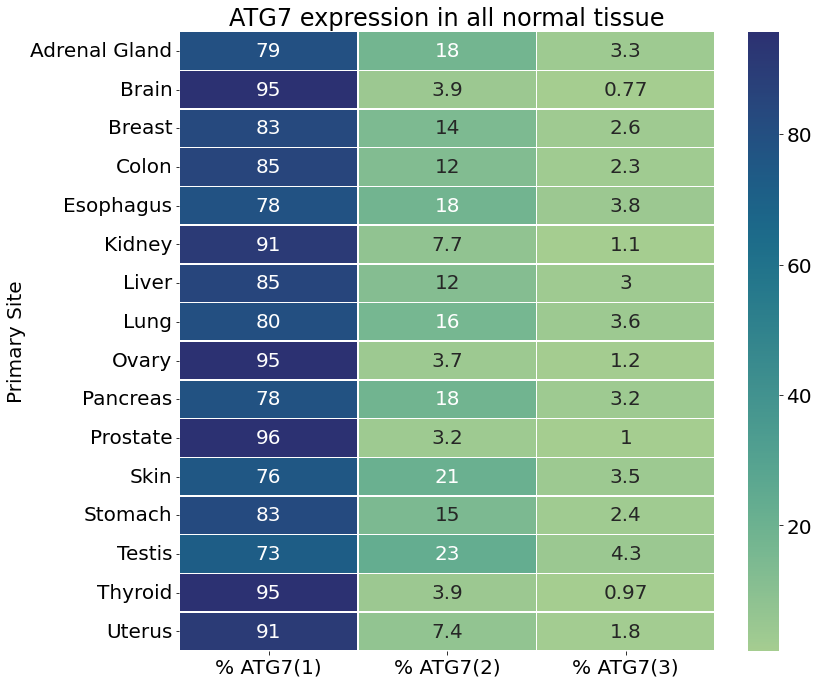

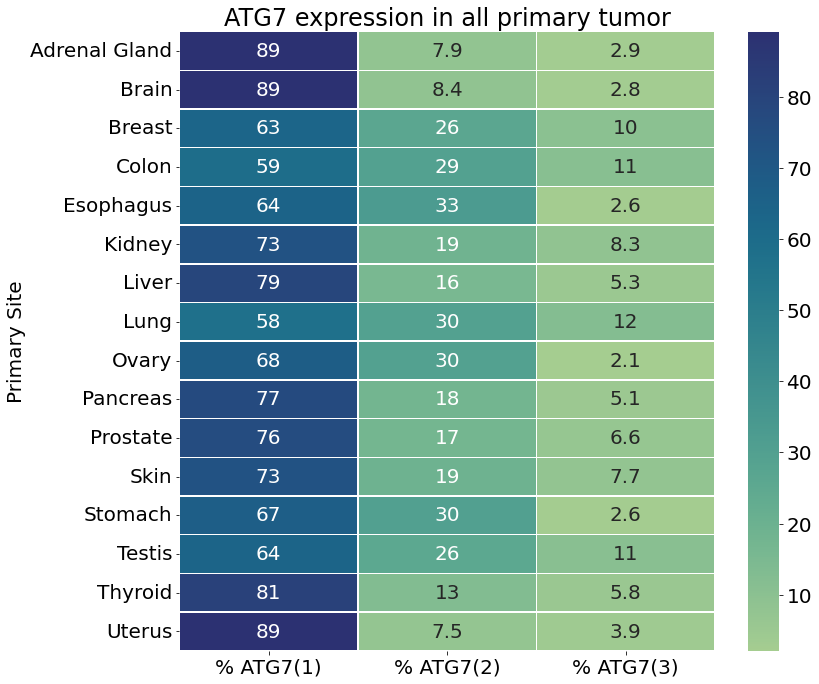

<Figure size 864x576 with 0 Axes>

In [6]:
#heatmap percentage
all_data = [[df_sampletype_normal, 'normal tissue'], [df_sampletype_primary, 'primary tumor']]

for data in all_data:
    df = data[0]
    label = data[1]

    HeatMap_df = df[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
    heatmap = seaborn.heatmap(HeatMap_df, annot=True, cmap="crest", linewidths=.5)
    plt.title('ATG7 expression in all '+label)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(top=1.2)
    
    path2 = 'figs_ATG7_characterisation/'
    name = 'heatmap_organs_' + label
    plt.savefig(path+path2+name+'.svg')
    plt.show()
    plt.clf()

tpm ATG7
primary tumor
    Primary Site  tpm ATG7
0  Adrenal Gland     11.60
1          Brain      7.94
primary tumor
    Primary Site  tpm ATG7
0  Adrenal Gland     11.35
1          Brain     17.50


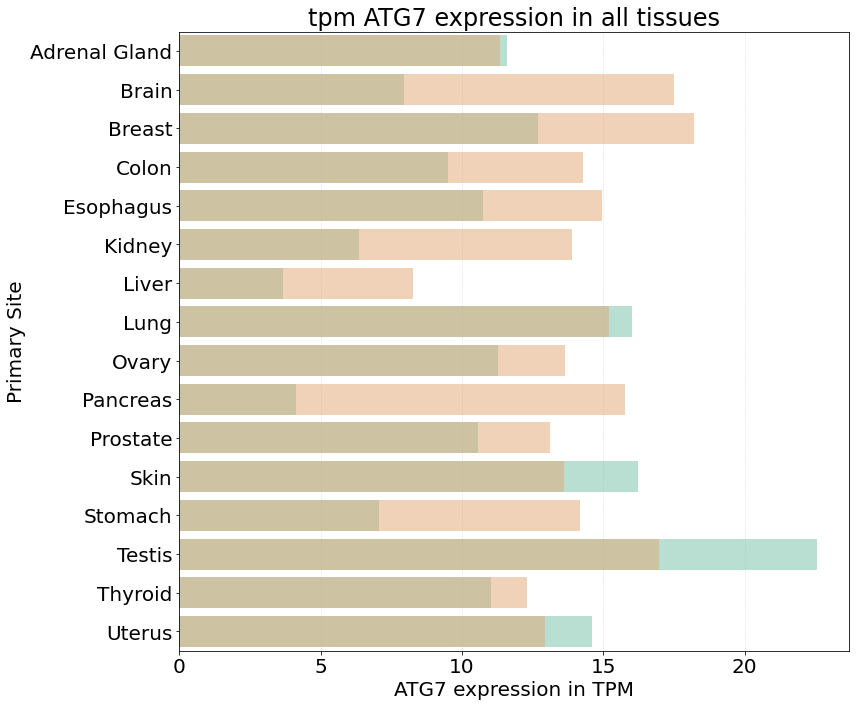

tpm ATG7(1)
primary tumor
    Primary Site  tpm ATG7(1)
0  Adrenal Gland         6.15
1          Brain         5.65
primary tumor
    Primary Site  tpm ATG7(1)
0  Adrenal Gland         7.80
1          Brain        11.21


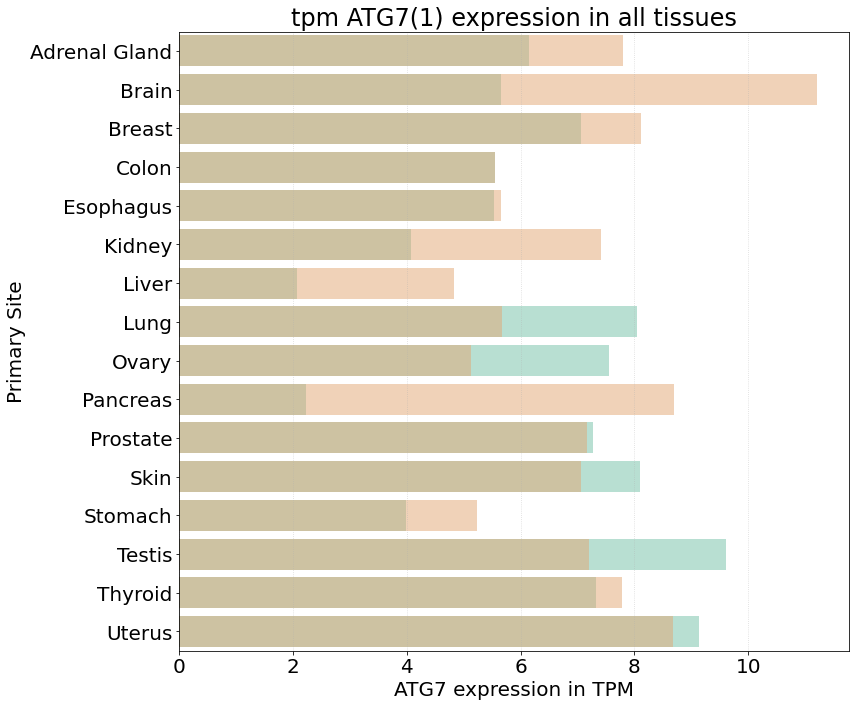

tpm ATG7(2)
primary tumor
    Primary Site  tpm ATG7(2)
0  Adrenal Gland         1.54
1          Brain         0.30
primary tumor
    Primary Site  tpm ATG7(2)
0  Adrenal Gland         0.83
1          Brain         1.21


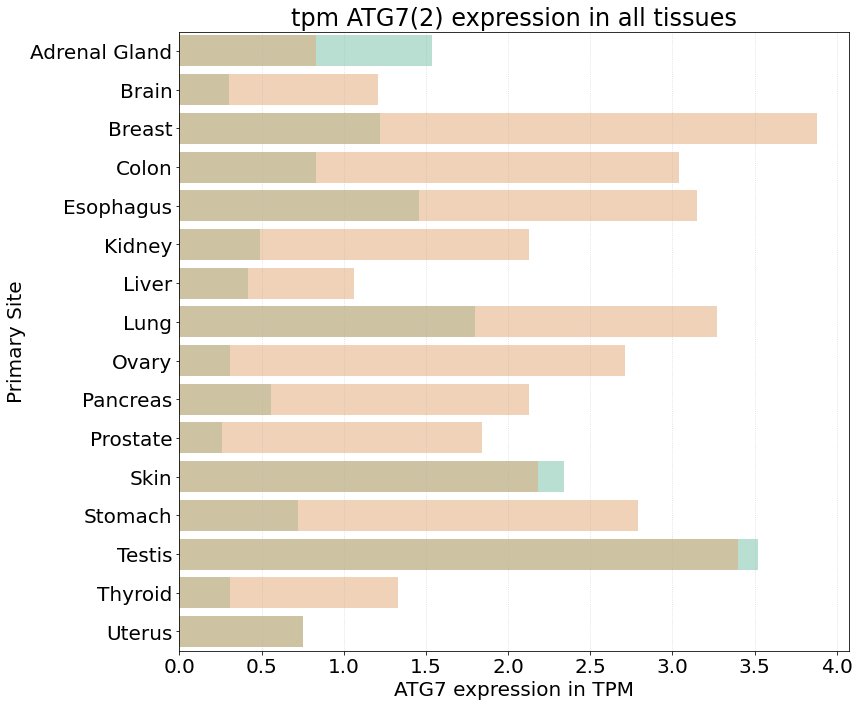

<Figure size 864x576 with 0 Axes>

In [7]:
dfs = df_sampletype_normal, df_sampletype_primary
colors = 'mediumaquamarine', 'sandybrown'

isoforms = 'tpm ATG7', 'tpm ATG7(1)', 'tpm ATG7(2)'

for isoform in isoforms:
    print(isoform)

    for i in range(len(dfs)):
        df = dfs[i]
        color_ = colors[i]

        print(label)
        hist_df = df.reset_index()
        hist_df = hist_df[['Primary Site', isoform]]
        print(hist_df.head(2))

        # Seaborn
        seaborn.barplot(data = hist_df, x =  isoform, y = 'Primary Site', alpha=0.5, color = color_)
        plt.title(isoform+' expression in all tissues')
        plt.xlabel('ATG7 expression in TPM')
        plt.subplots_adjust(top=1.2)
        plt.yticks(fontsize=20)

        name = 'histo_organs_'
        #     plt.savefig(path+path2+name+'.svg')
        #     plt.show()
    plt.show()
    plt.clf()

log2_p1_ATG7_total


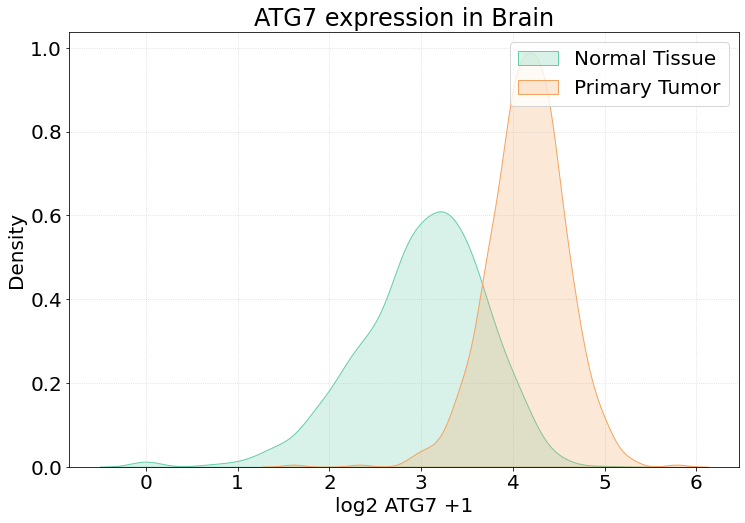

log2_p1_ATG7_1


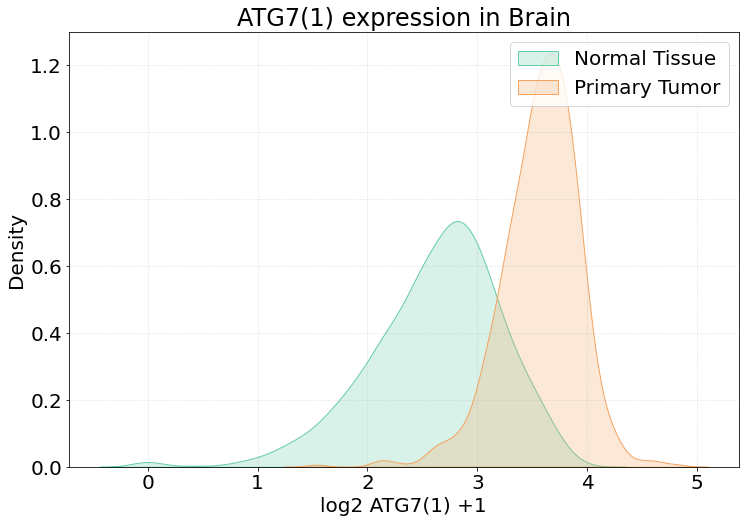

log2_p1_ATG7_2


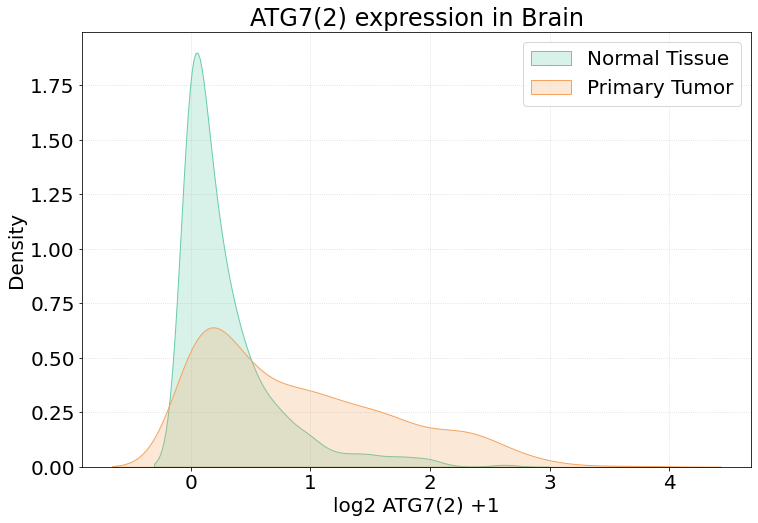

log2_p1_ATG7_total


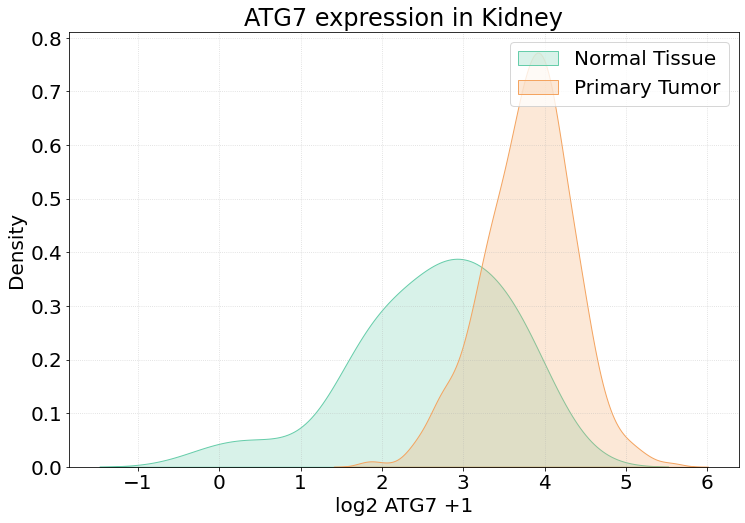

log2_p1_ATG7_1


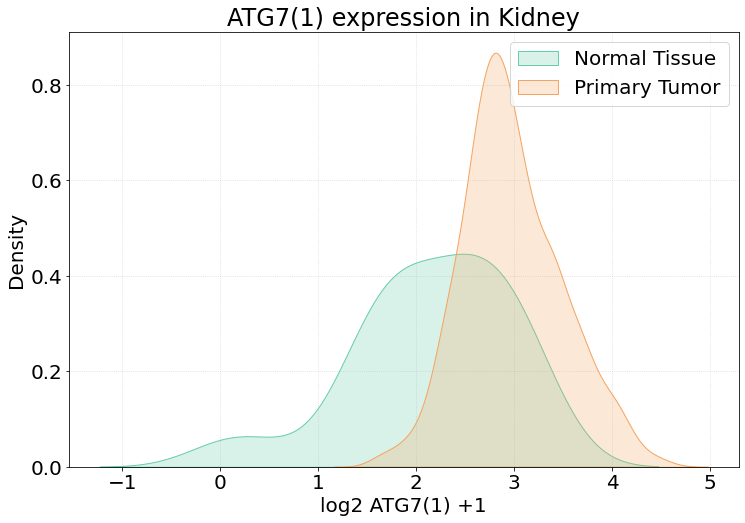

log2_p1_ATG7_2


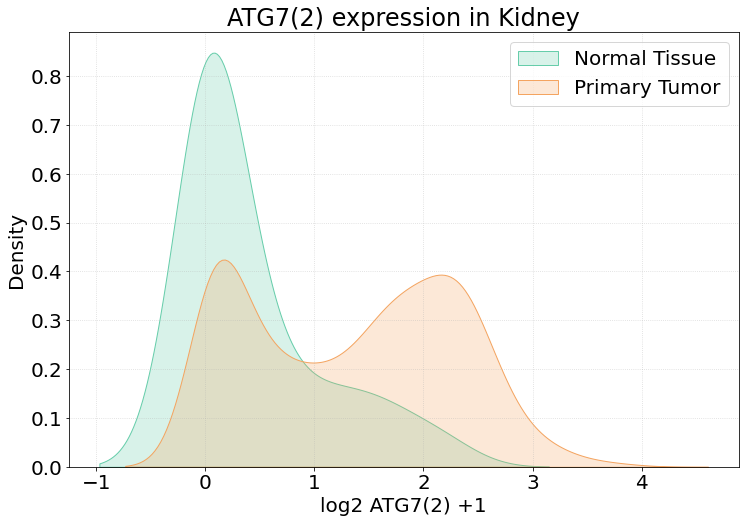

log2_p1_ATG7_total


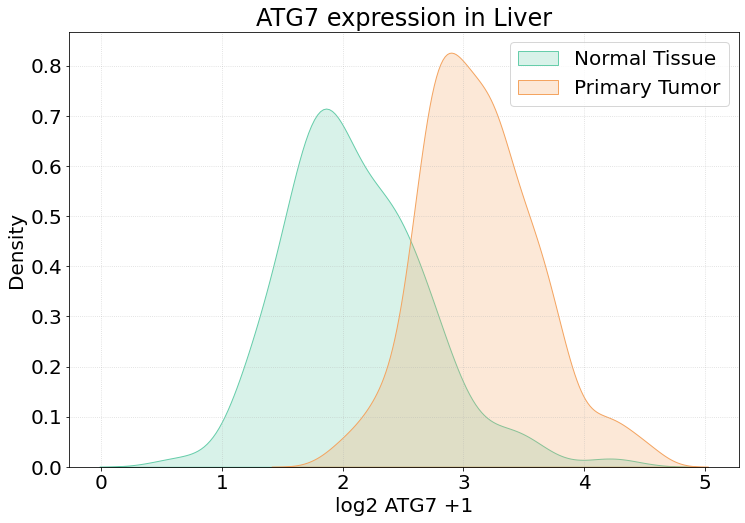

log2_p1_ATG7_1


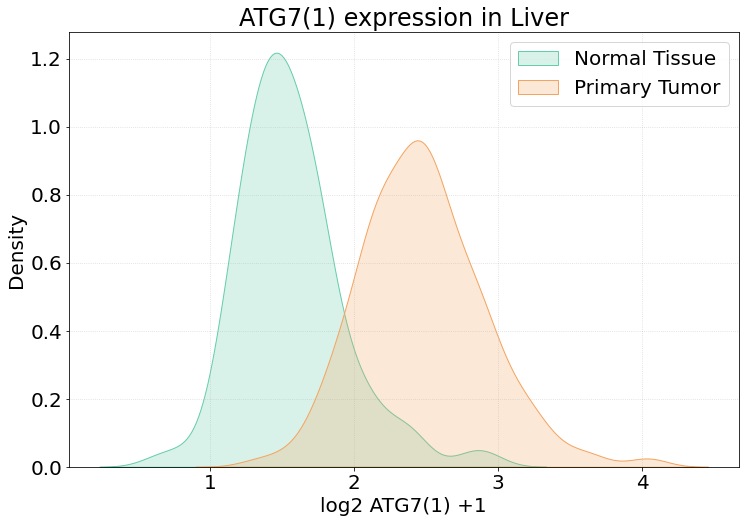

log2_p1_ATG7_2


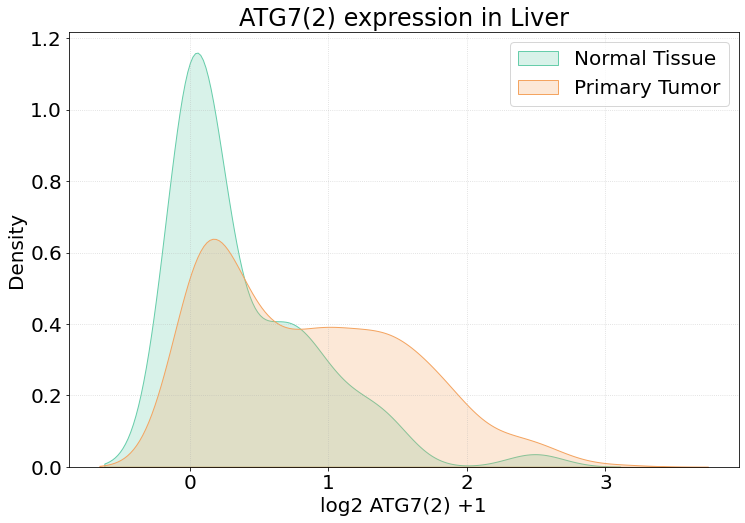

log2_p1_ATG7_total


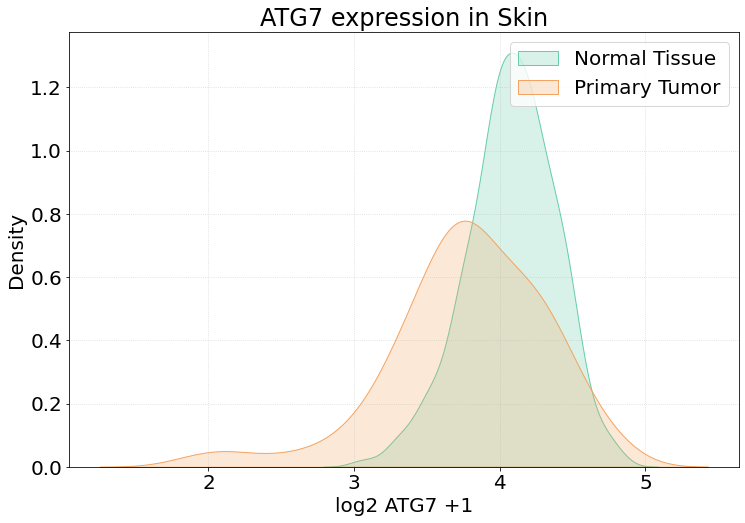

log2_p1_ATG7_1


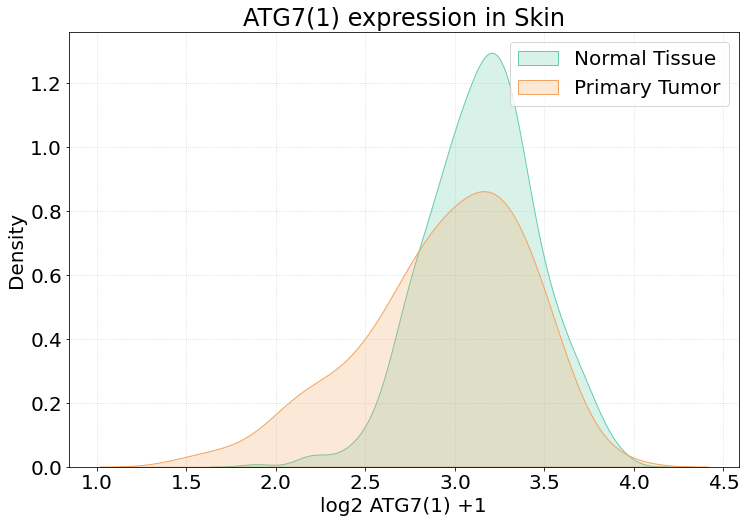

log2_p1_ATG7_2


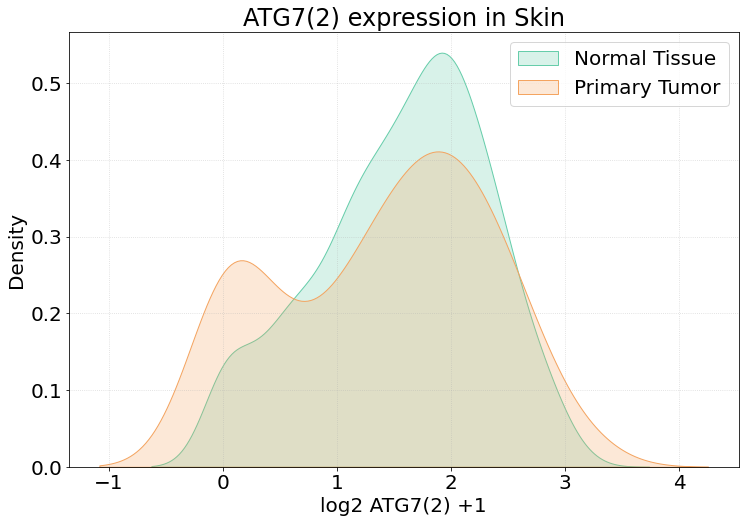

log2_p1_ATG7_total


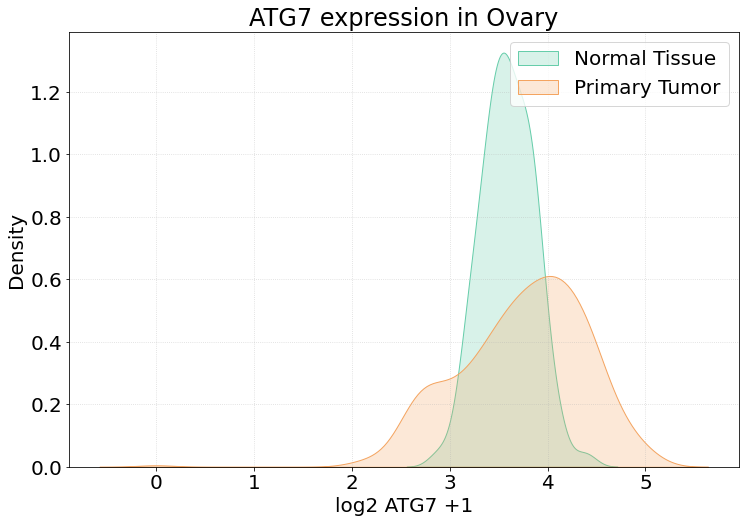

log2_p1_ATG7_1


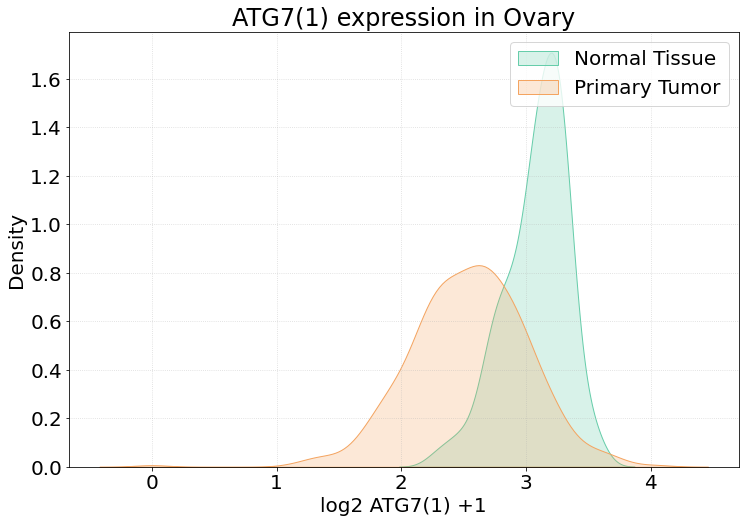

log2_p1_ATG7_2


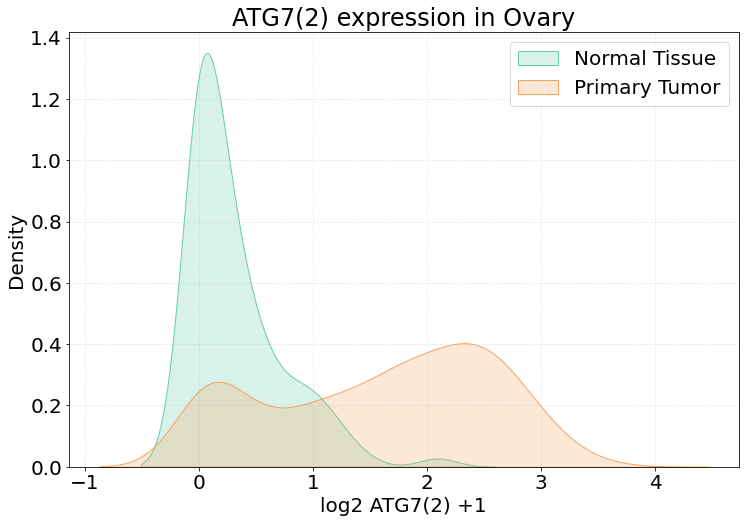

log2_p1_ATG7_total


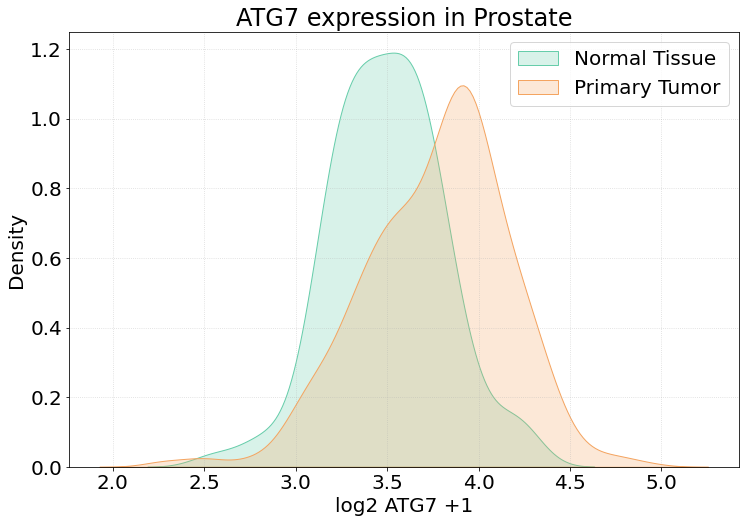

log2_p1_ATG7_1


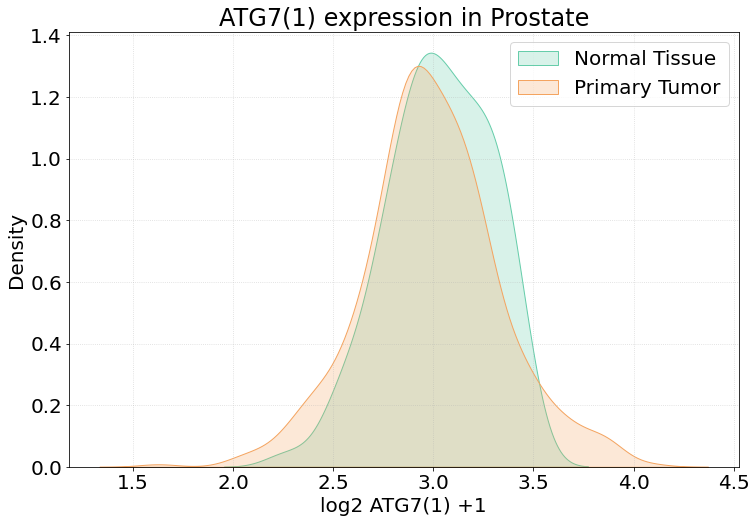

log2_p1_ATG7_2


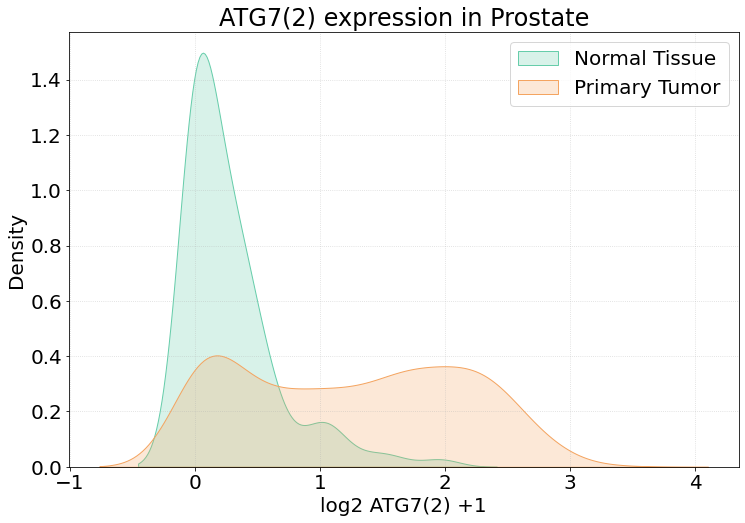

log2_p1_ATG7_total


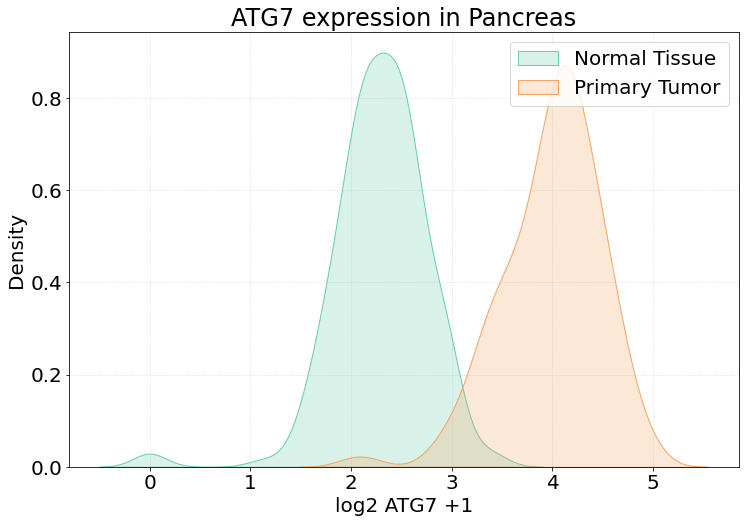

log2_p1_ATG7_1


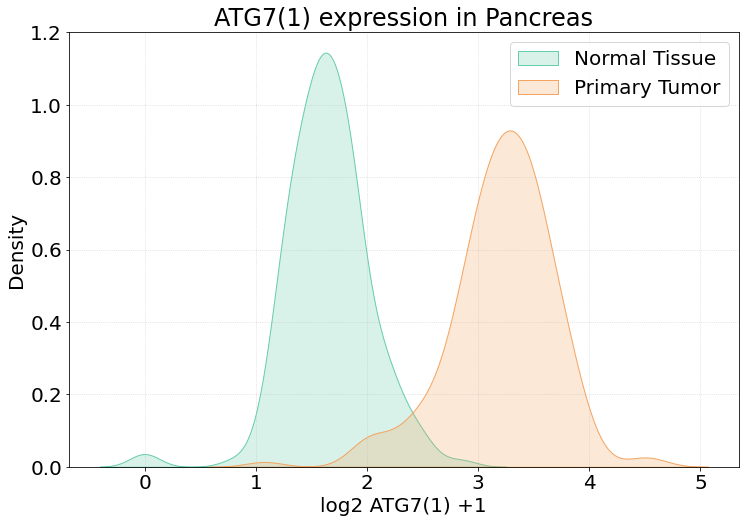

log2_p1_ATG7_2


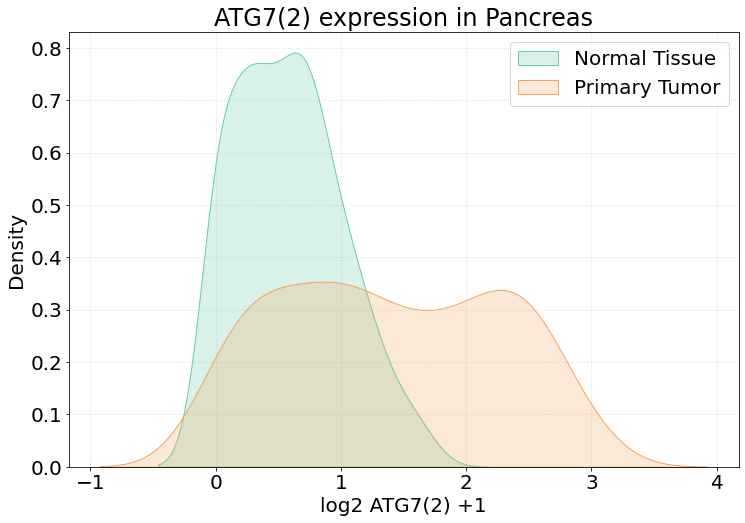

log2_p1_ATG7_total


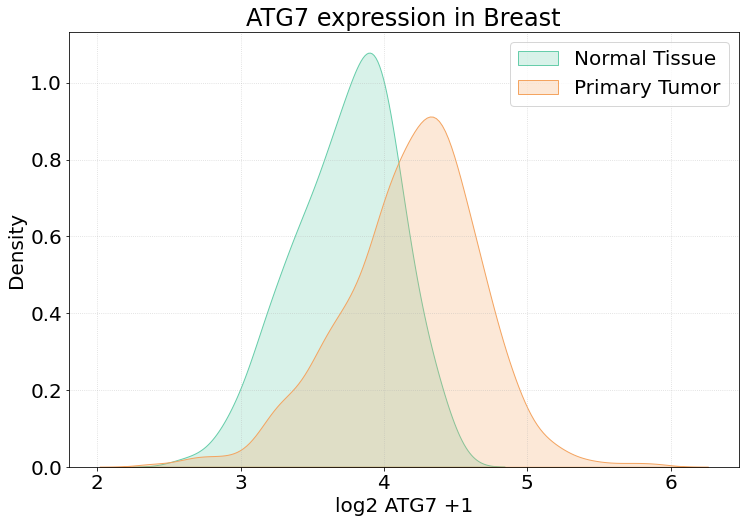

log2_p1_ATG7_1


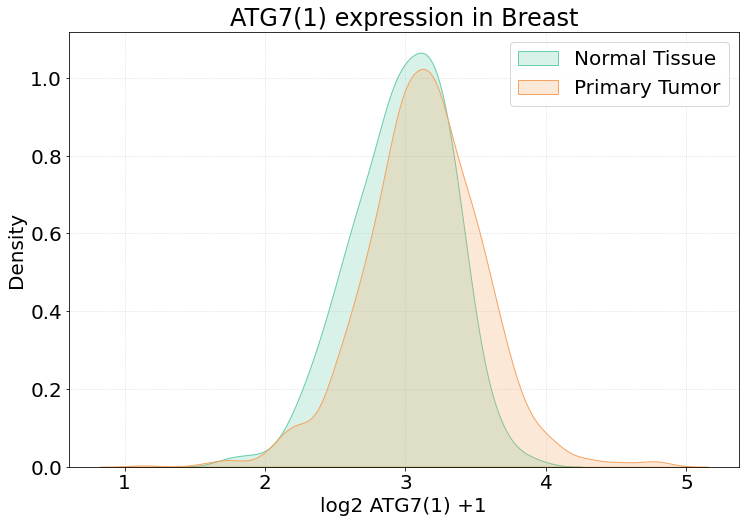

log2_p1_ATG7_2


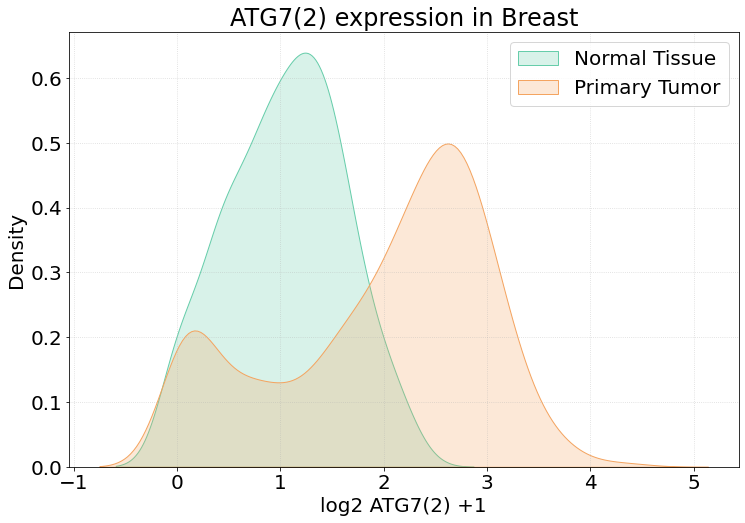

log2_p1_ATG7_total


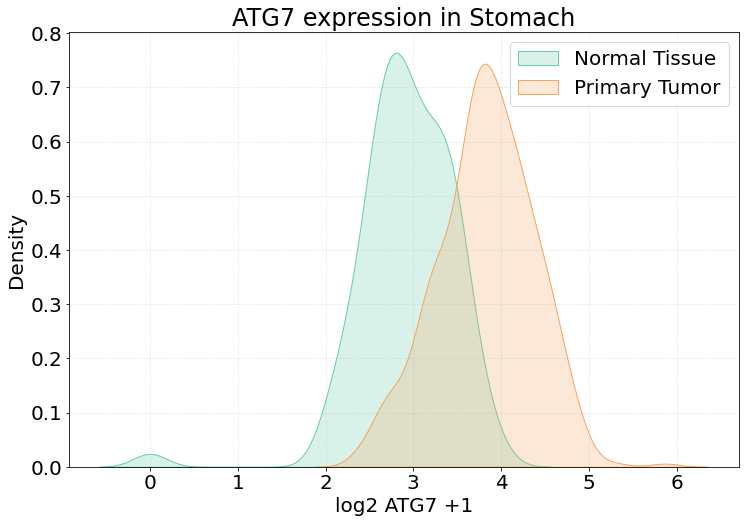

log2_p1_ATG7_1


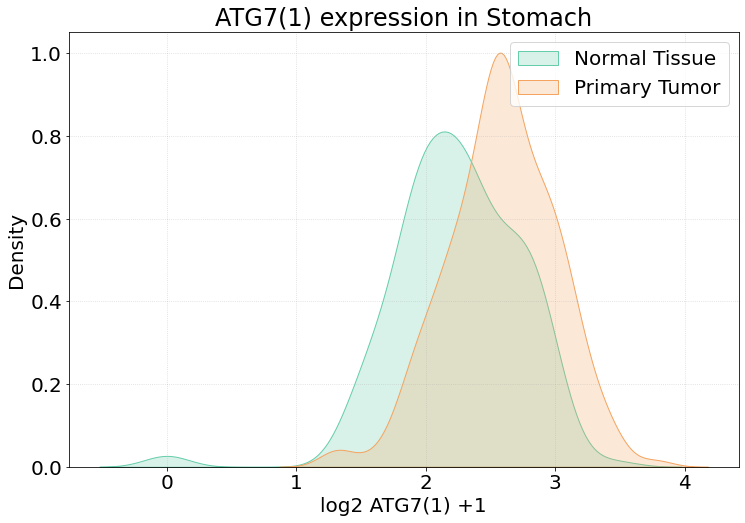

log2_p1_ATG7_2


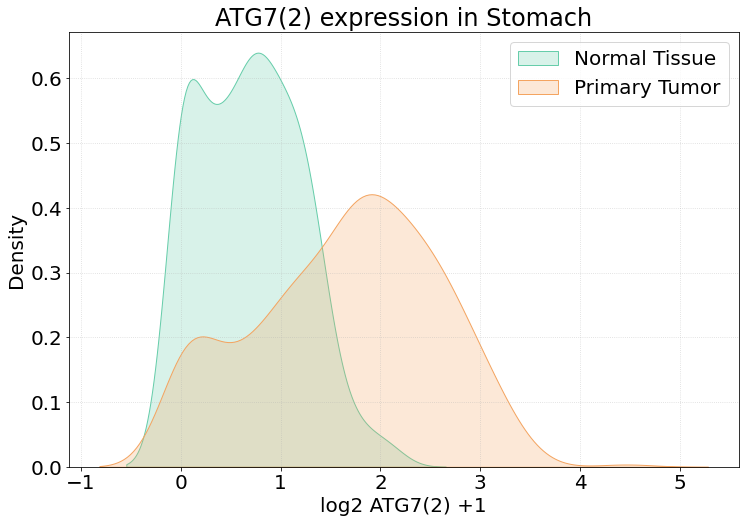

log2_p1_ATG7_total


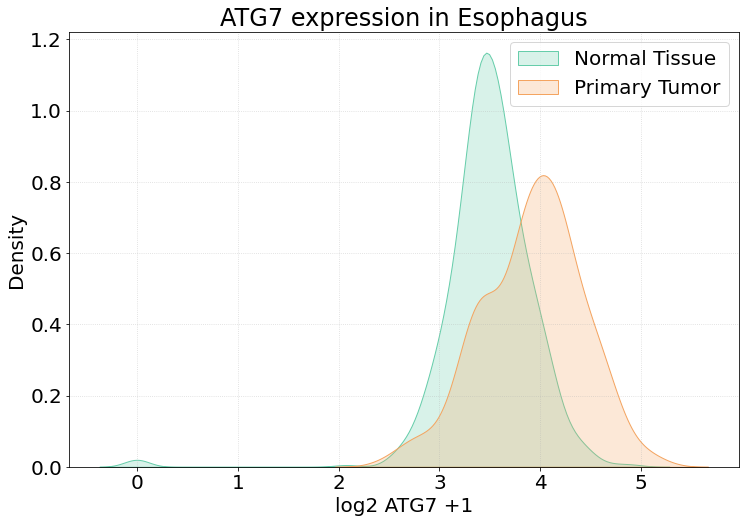

log2_p1_ATG7_1


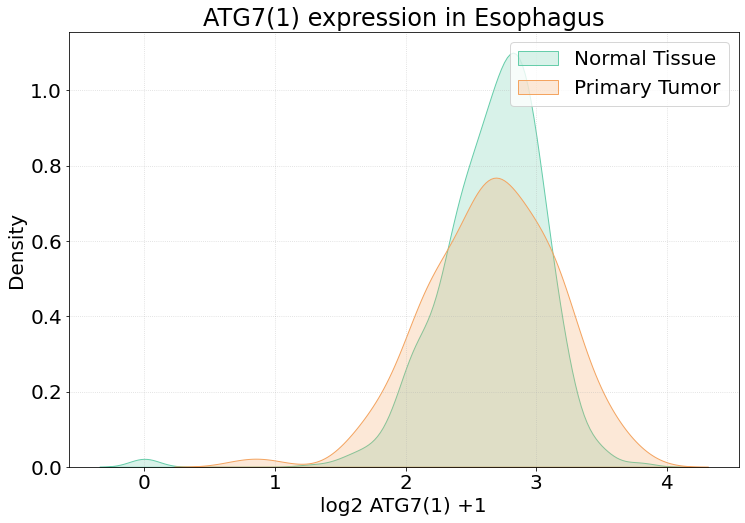

log2_p1_ATG7_2


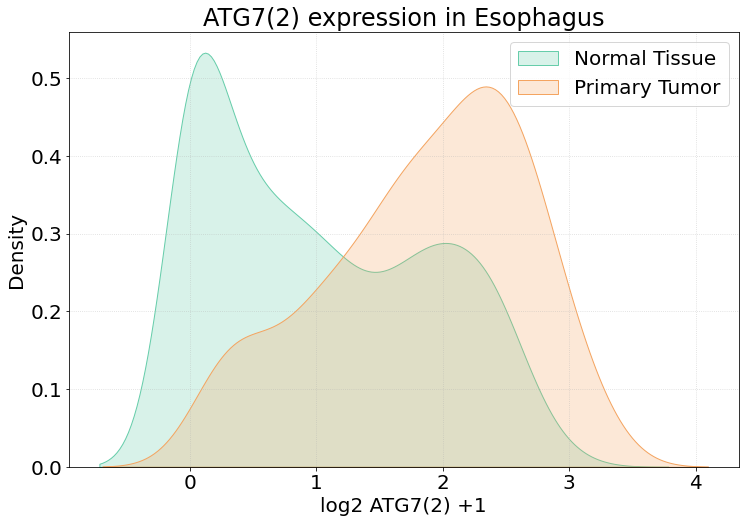

log2_p1_ATG7_total


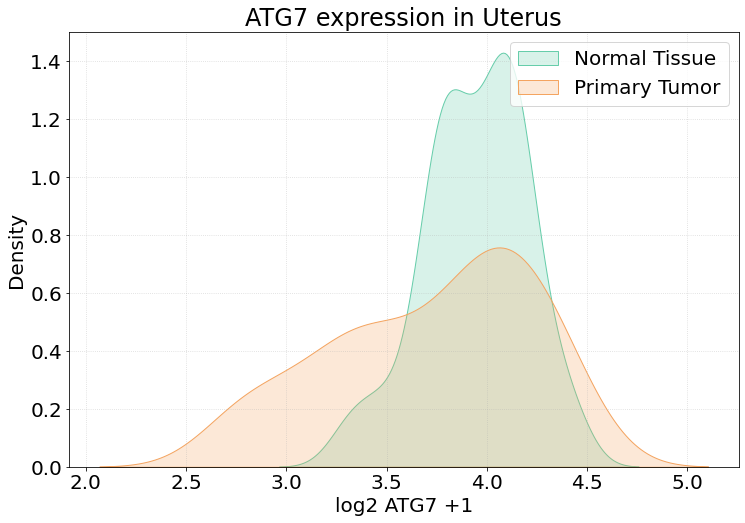

log2_p1_ATG7_1


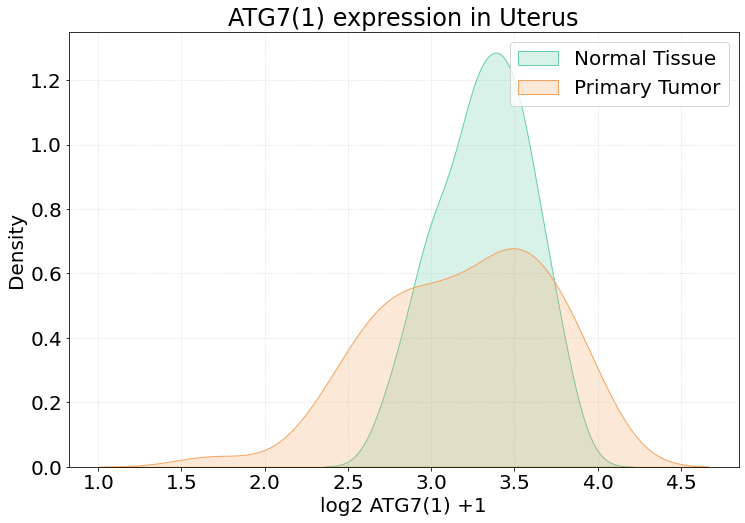

log2_p1_ATG7_2


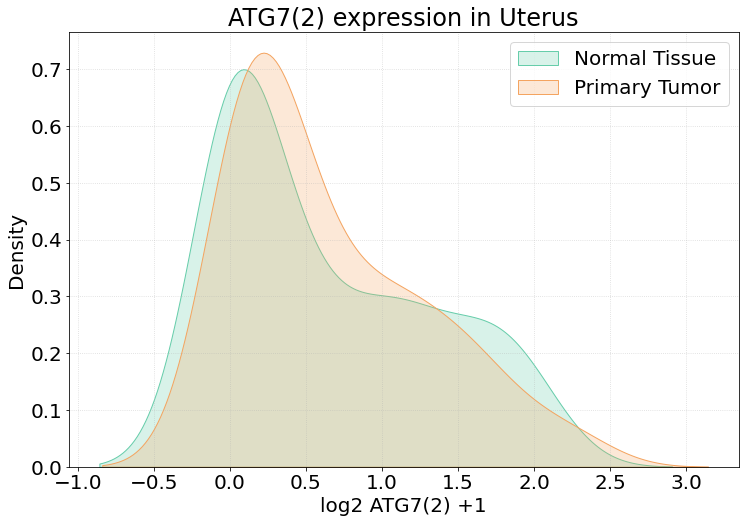

log2_p1_ATG7_total


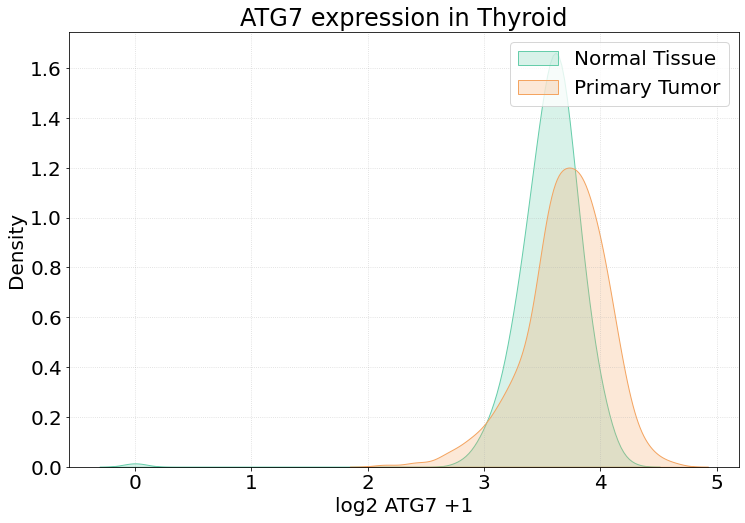

log2_p1_ATG7_1


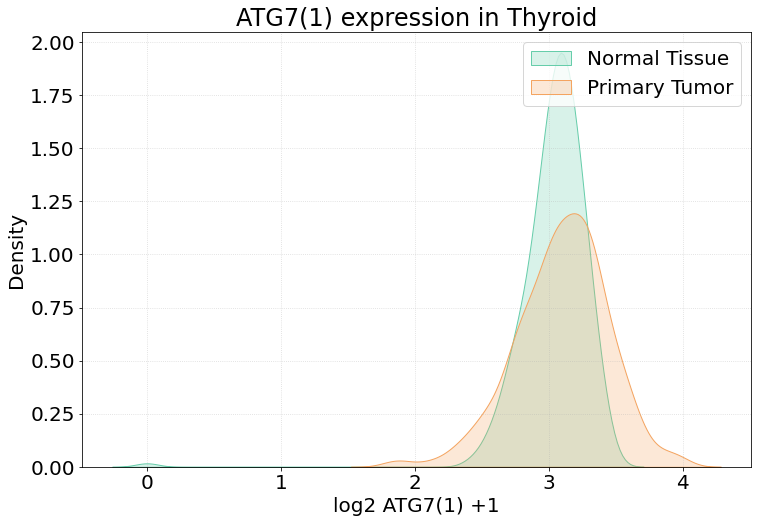

log2_p1_ATG7_2


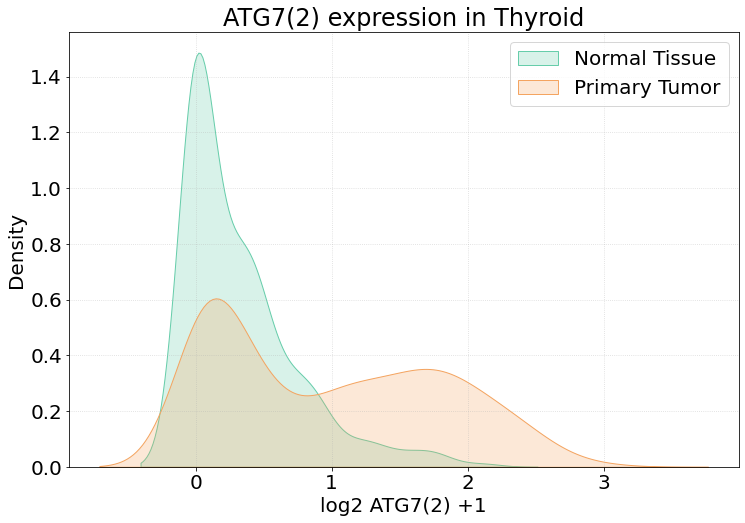

log2_p1_ATG7_total


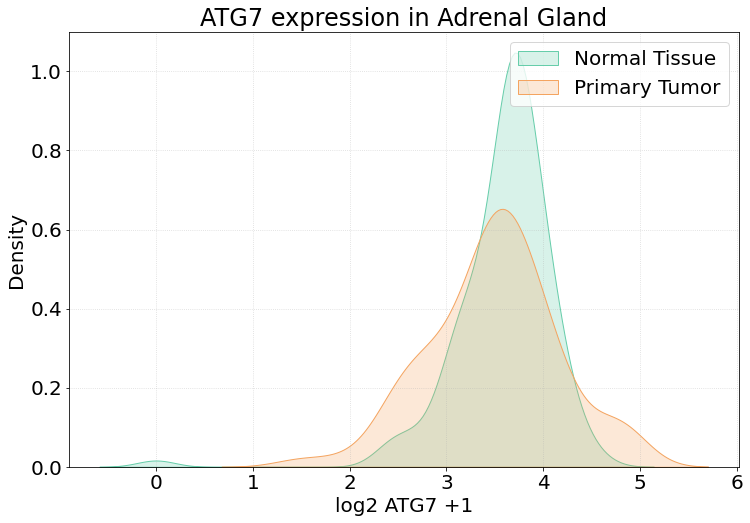

log2_p1_ATG7_1


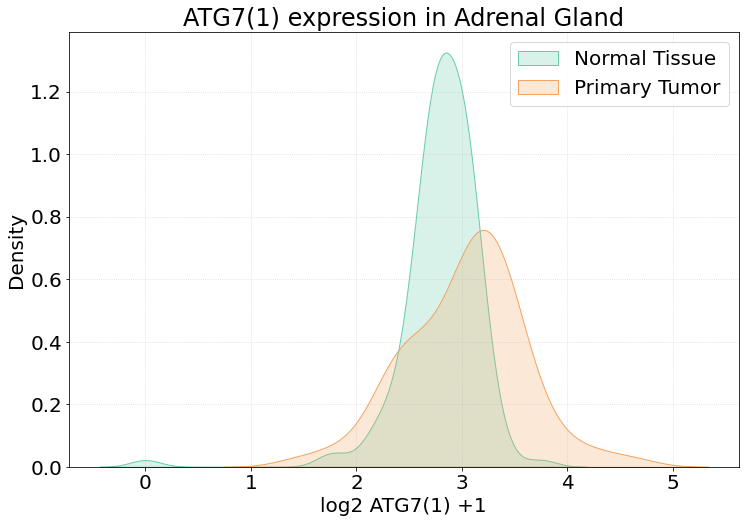

log2_p1_ATG7_2


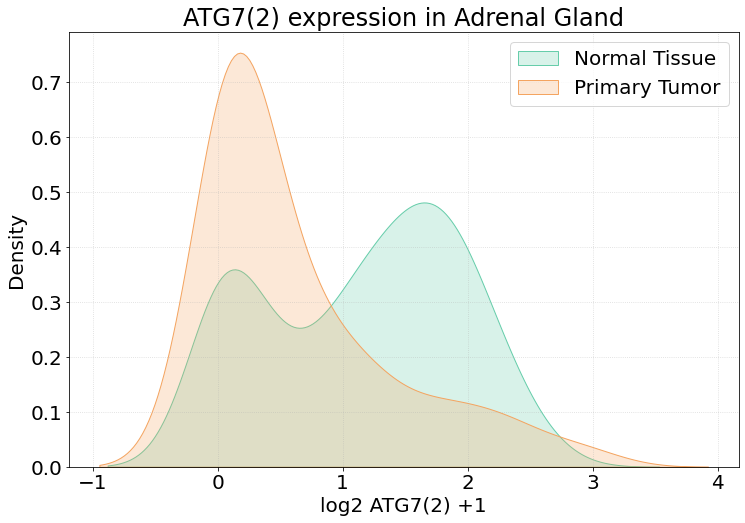

log2_p1_ATG7_total


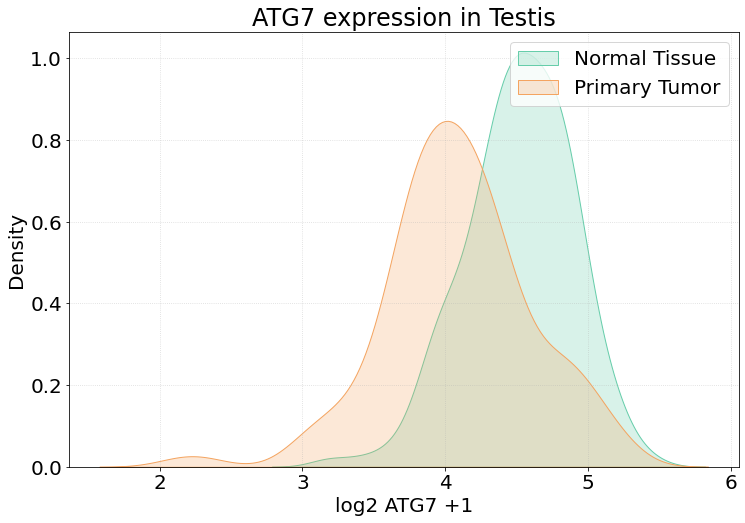

log2_p1_ATG7_1


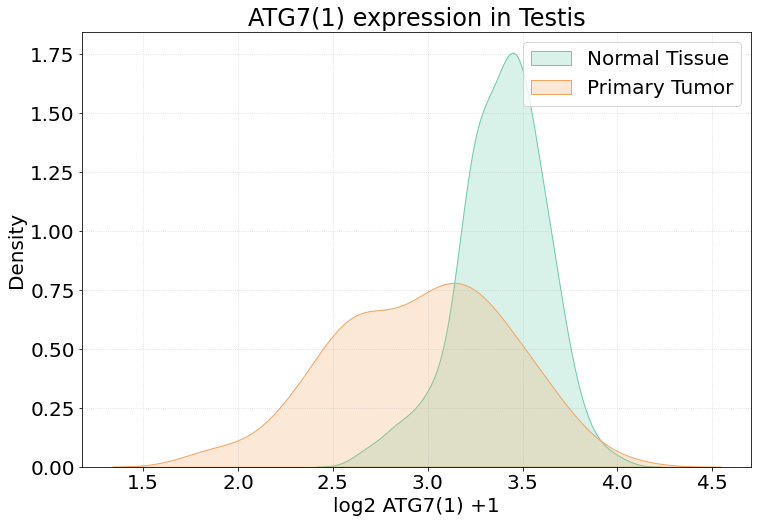

log2_p1_ATG7_2


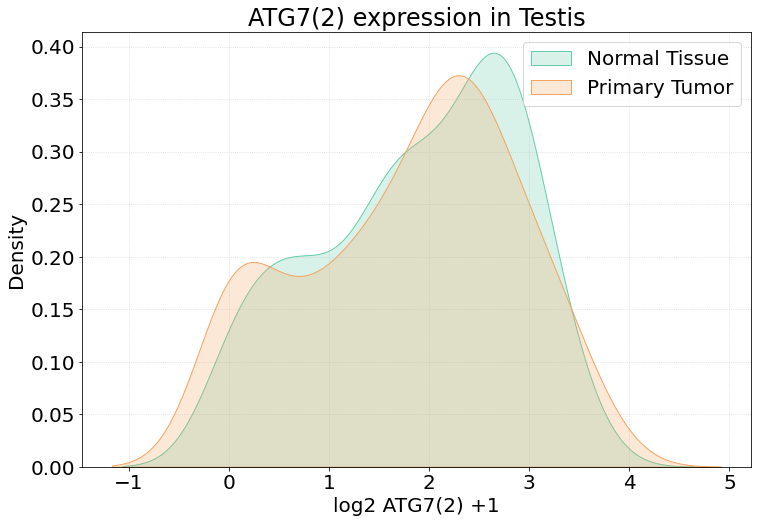

log2_p1_ATG7_total


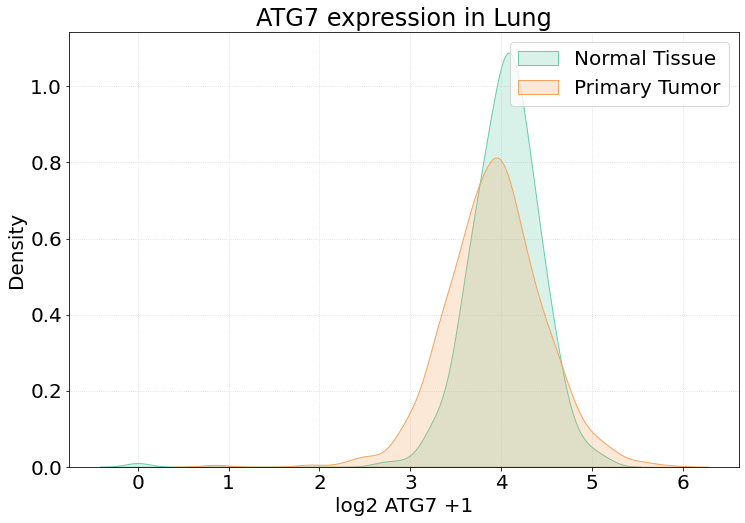

log2_p1_ATG7_1


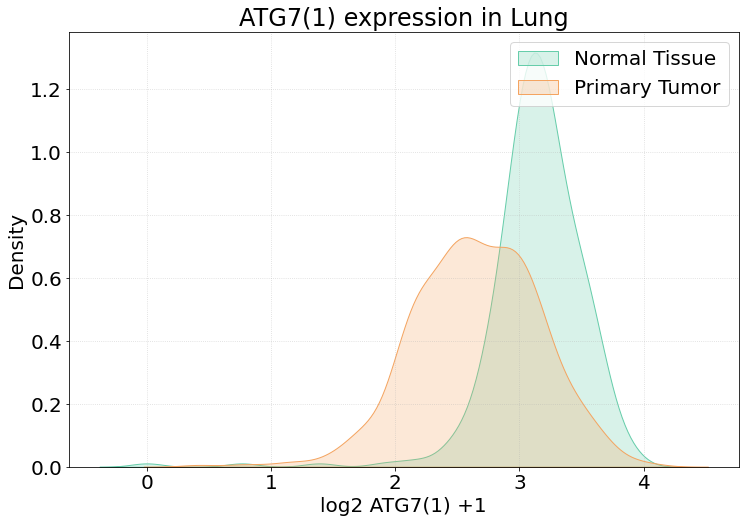

log2_p1_ATG7_2


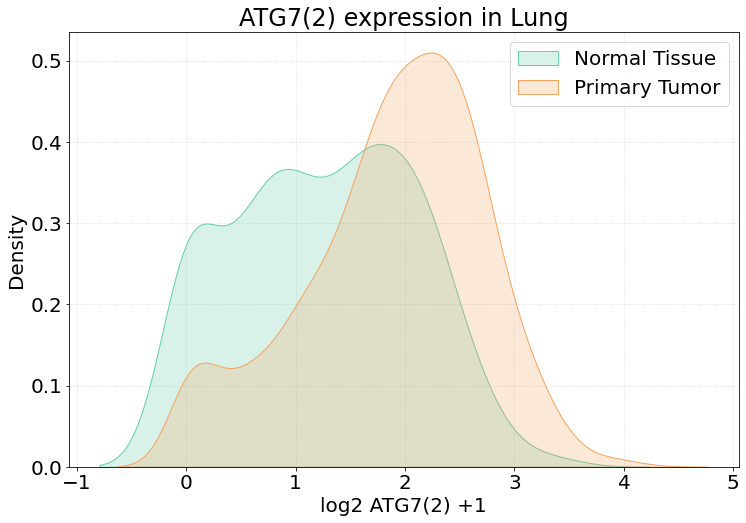

log2_p1_ATG7_total


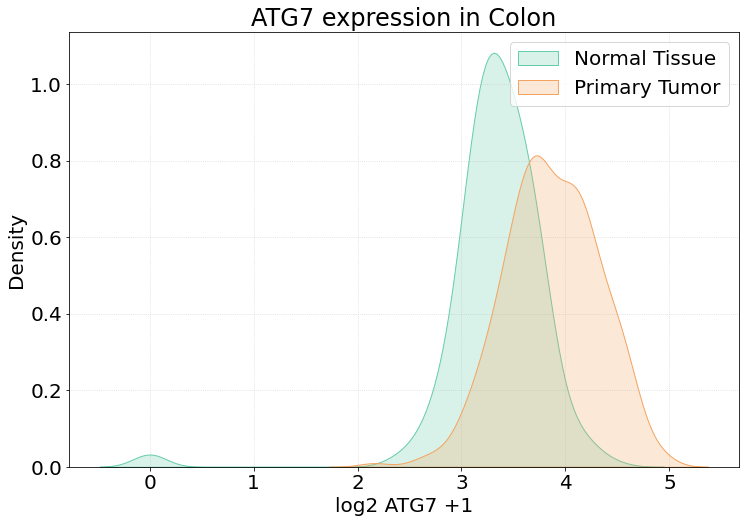

log2_p1_ATG7_1


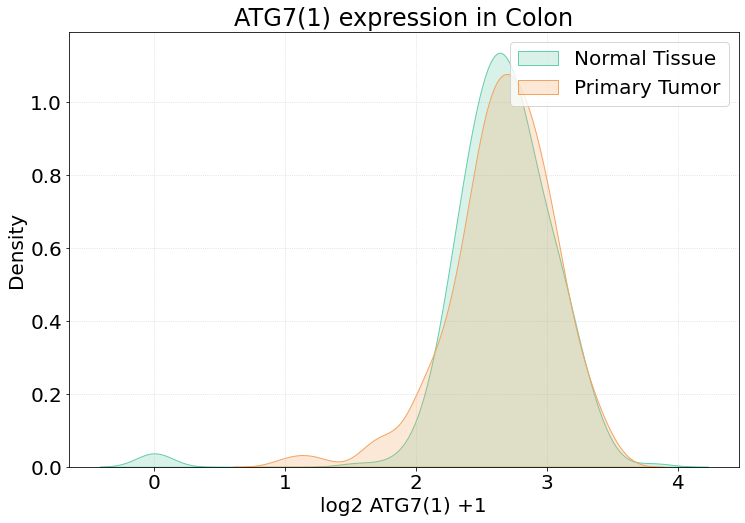

log2_p1_ATG7_2


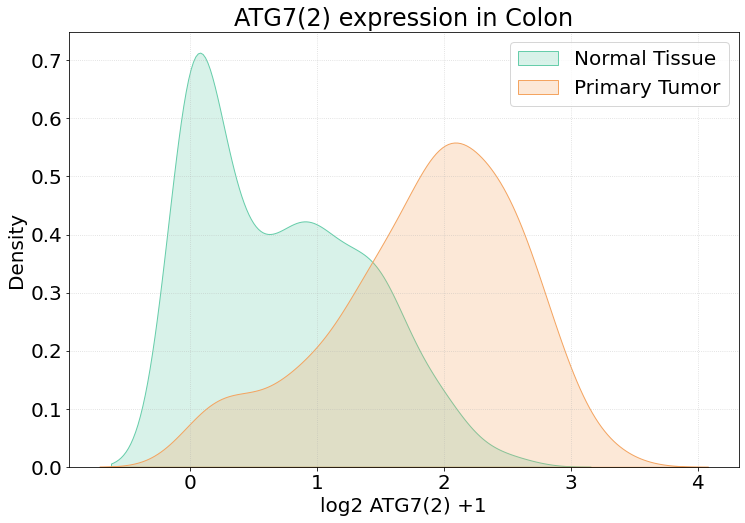

<Figure size 864x576 with 0 Axes>

In [8]:
# Distribution graph, for ATG7, iso1 & iso2
isoforms = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
for tissue in tissues:  
    df1 = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    df2 = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == tissue]
    
    for i in range(len(isoforms)):
        isoform = isoforms[i]
        print(isoform)
        isoform_info = isoforms_info[i]

        xData = df1[isoform]
        x2Data = df2[isoform]

        seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
        seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

        plt.xlabel('log2 '+ isoform_info + ' +1')
        plt.title(isoform_info+ ' expression '+ 'in '+tissue)
        plt.legend(labels=["Normal Tissue","Primary Tumor"])
        title_file = 'distrib_' + isoform_info + '_' + tissue
        plt.savefig(path+path2+'distribution/'+title_file+'.pdf')
        plt.show()
        plt.clf()

In [9]:
#Remove tissues with lower than 20 samples. 
p_value1_l = []
p_value2_l = []

foldchange_1_l = []
foldchange_2_l = []

tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
isoforms = 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
pvalue_lists = p_value1_l, p_value2_l
fc_lists = foldchange_1_l, foldchange_2_l

tissue_l = []

for tissue in tissues:
    tissue_l.append(tissue)
    
    df1 = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    df2 = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == tissue]
    
    for i in range(len(isoforms)):
        isoform = isoforms[i]
        pvalue_l = pvalue_lists[i]
        foldchange_l = fc_lists[i]
        
        #add FoldChange (primary - normal)
        fc = df2[isoform].median() - df1[isoform].median()
        foldchange_l.append(fc)
        # Mann-Whitney analysis ATG7(1)
        statistic, pvalue = scipy.stats.mannwhitneyu(df1[isoform], df2[isoform])
        pvalue_l.append(pvalue)

# bonferroni correction on the number of tests. 32 (16 tissues x2)
p_values_nonAdj = p_value1_l + p_value2_l
sign_answer, adj_pvalue, c , d  = multipletests(p_values_nonAdj, alpha = 0.05, method='bonferroni')
   
#save in dict, then to df
d = dict(tissue = tissue_l, 
         FC_ATG7_1 = foldchange_1_l, p_value_iso1 = p_value1_l, adj_pvalue_iso1 = adj_pvalue[0:16],
         FC_ATG7_2 = foldchange_2_l, p_value_iso2 = p_value2_l, adj_pvalue_iso2 = adj_pvalue[16:])

df_ATG7_diff_tissues = pandas.DataFrame.from_dict(d, orient='index')

#Transpose to have a better table
df_ATG7_diff_tissues = df_ATG7_diff_tissues.transpose()

#create column for absolute difference order
df_ATG7_diff_tissues = df_ATG7_diff_tissues.assign(abs_diff = (abs(df_ATG7_diff_tissues['FC_ATG7_2'])) - abs(df_ATG7_diff_tissues['FC_ATG7_1']))
df_ATG7_diff_tissues = df_ATG7_diff_tissues.sort_values('abs_diff', ascending=False)

# and reset_index
df_ATG7_diff_tissues.set_index('tissue',inplace = True, drop = True)

df_ATG7_diff_tissues

,FC_ATG7_1,p_value_iso1,adj_pvalue_iso1,FC_ATG7_2,p_value_iso2,adj_pvalue_iso2,abs_diff
tissue,,,,,,,
Colon,0.0248952,0.422163,1,1.36907,1.03963e-54,3.32682e-53,1.34418
Esophagus,-0.0262125,0.460072,1,1.08083,1.15327e-26,3.69046e-25,1.05462
Ovary,-0.546526,1.36335e-25,4.36271e-24,1.59791,8.80761e-27,2.81843e-25,1.05139
Prostate,-0.0630824,0.0626905,1,1.09957,1.44006e-24,4.60819e-23,1.03649
Breast,0.148718,1.20473e-06,3.85513e-05,1.17305,1.29506e-33,4.14418e-32,1.02433
Kidney,0.648165,2.6948e-08,8.62336e-07,1.41016,2.45123e-08,7.84393e-07,0.762
Stomach,0.363026,2.10039e-15,6.72124e-14,1.05443,1.37636e-32,4.40435e-31,0.691401
Thyroid,0.0521011,0.00132658,0.0424507,0.740718,1.68624e-31,5.39597e-30,0.688617
Adrenal Gland,0.278008,9.32342e-05,0.00298349,-0.943972,8.59861e-06,0.000275156,0.665964


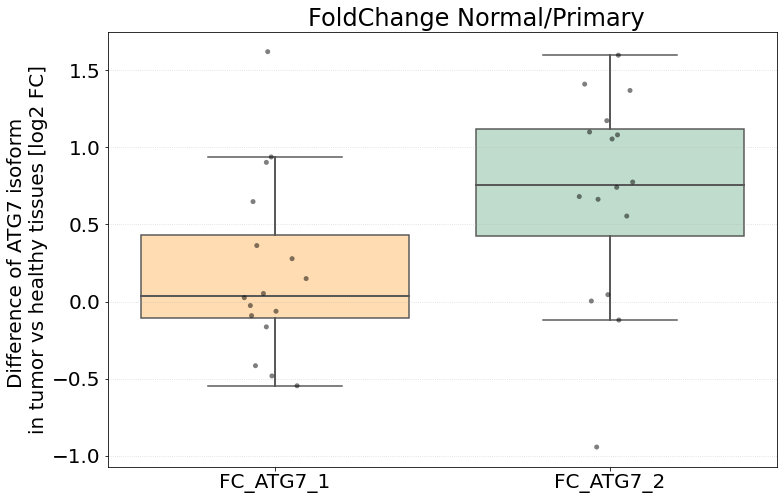

In [10]:
 #Graph, Bloxplot FC
df = df_ATG7_diff_tissues[['FC_ATG7_1','FC_ATG7_2']]

ax = seaborn.boxplot(palette = 'Set2', data = df, 
                     medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
seaborn.stripplot(data = df, color = 'black', alpha = 0.5)

# Select which box you want to change    
box_ATG7_1 = ax.artists[0]
box_ATG7_1.set_facecolor('darkorange')
box_ATG7_2 = ax.artists[1]
box_ATG7_2.set_facecolor('seagreen')

# adding transparency to colors
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .3))

plt.ylabel('Difference of ATG7 isoform \nin tumor vs healthy tissues [log2 FC]')
plt.xlabel('')
text_title = 'FoldChange Normal/Primary'
plt.title(text_title, x=.55)

title_file = 'boxplot_FC'
plt.savefig(path+path2+title_file+'.svg')

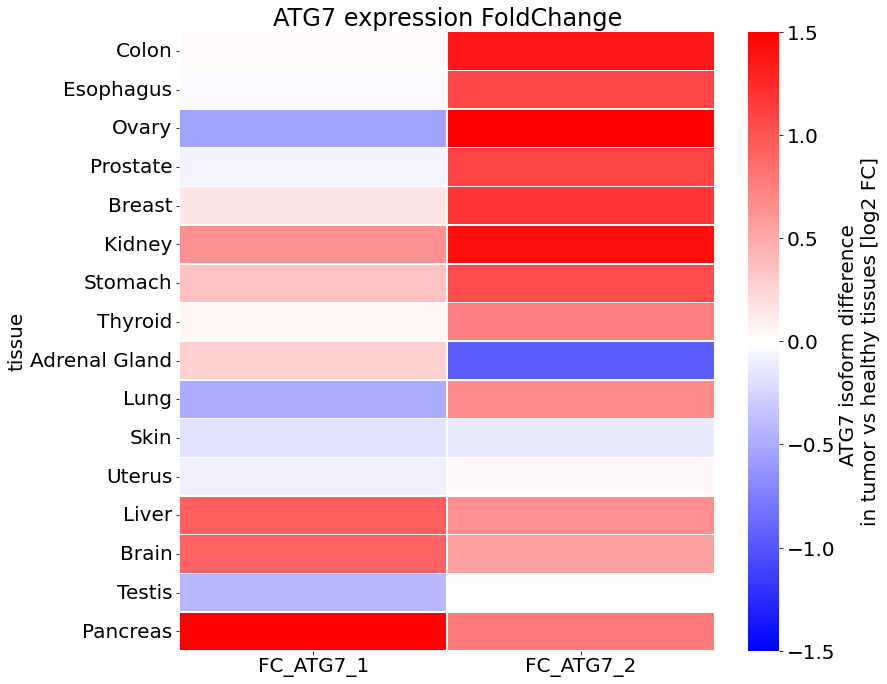

In [11]:
#Heatmap FC
df = df_ATG7_diff_tissues

HeatMap_df = df[['FC_ATG7_1', 'FC_ATG7_2']]
HeatMap_df = HeatMap_df.astype(float)
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-1.5, vmax=1.5,
               cbar_kws={'label': 'ATG7 isoform difference \nin tumor vs healthy tissues [log2 FC]'})
plt.title('ATG7 expression FoldChange')
plt.yticks(fontsize=20)
plt.subplots_adjust(top=1.2)

title_file = 'Heatmap_FC'
plt.savefig(path+path2+title_file+'.svg')